### Crop Recommendation
#### Maximize agricultural yield by recommending appropriate crops

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.duplicated().sum()

0

#### N - ratio of Nitrogen content in soil
#### P - ratio of Phosphorous content in soil
#### K - ratio of Potassium content in soil
#### temperature - temperature in degree Celsius
#### humidity - relative humidity in %
#### ph - ph value of the soil
#### rainfall - rainfall in mm
#### label-crop

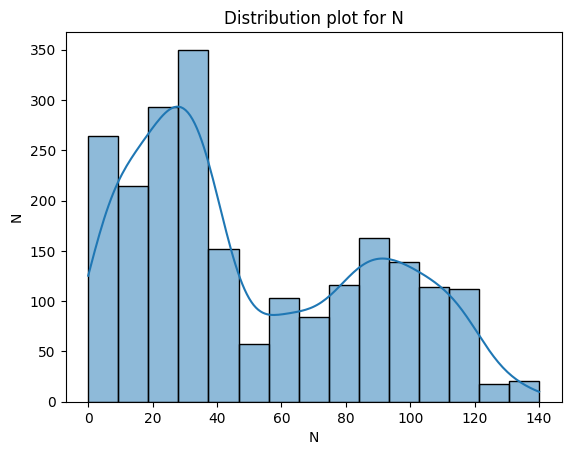

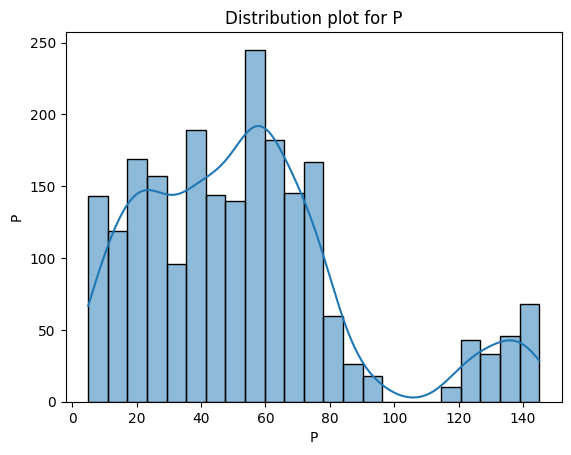

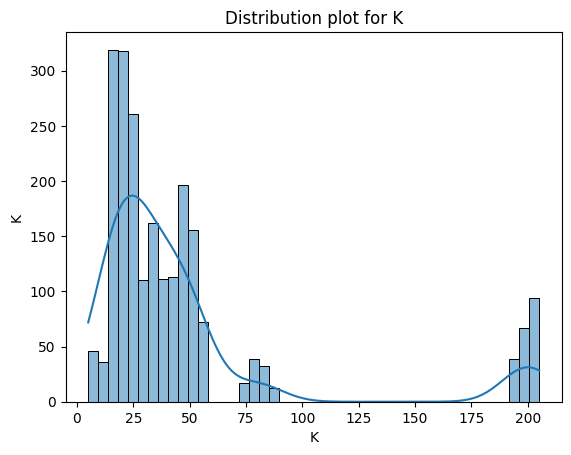

In [6]:
mine_cols = ['N','P','K']
for i in mine_cols:
    sns.histplot(df[i],kde=True)
    plt.title(f'Distribution plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()

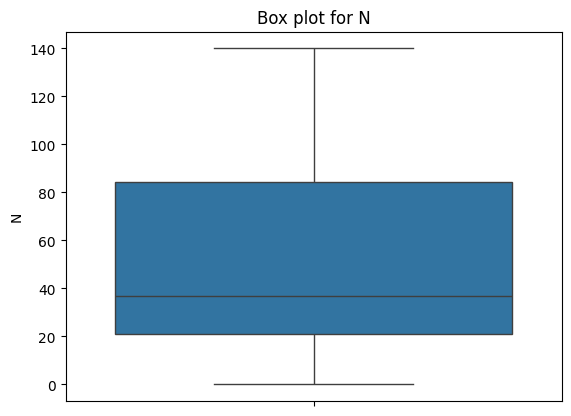

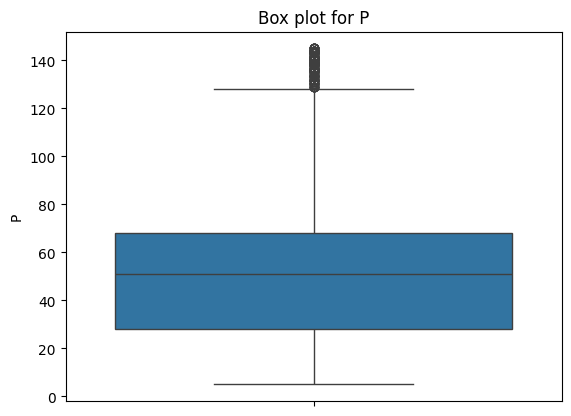

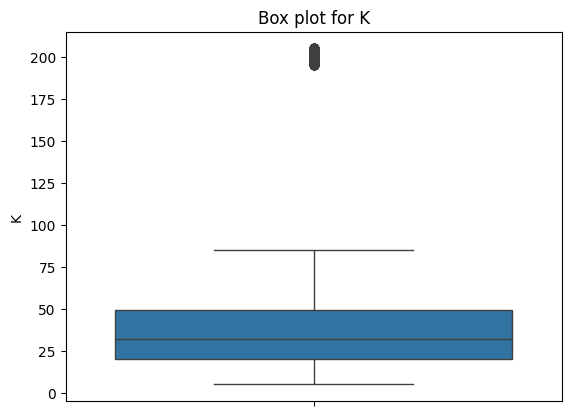

In [7]:
for i in mine_cols:
    sns.boxplot(df[i])
    plt.title(f'Box plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()

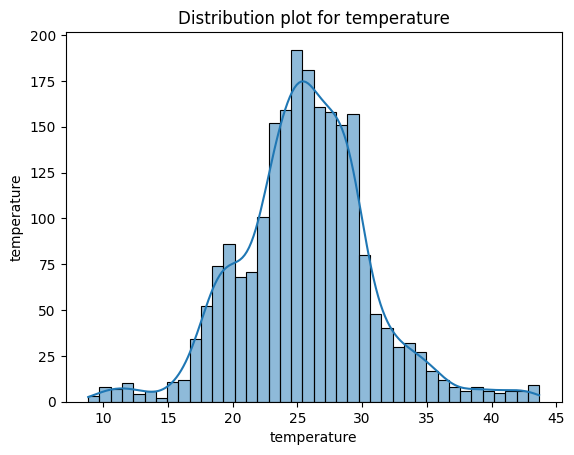

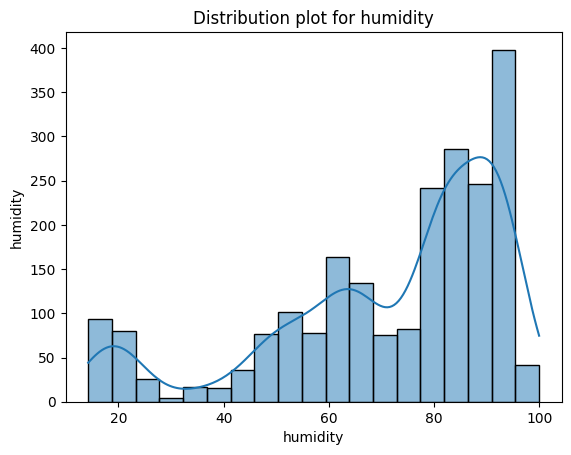

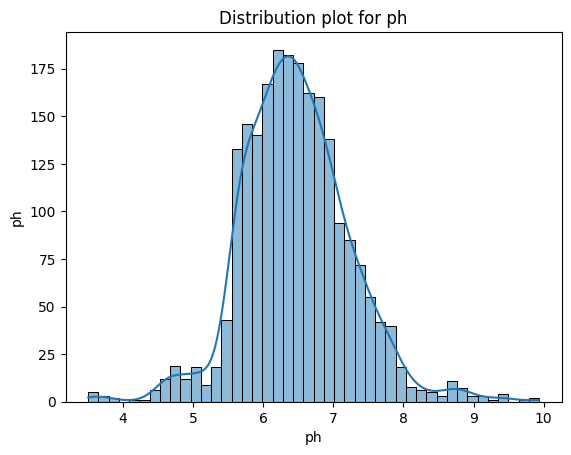

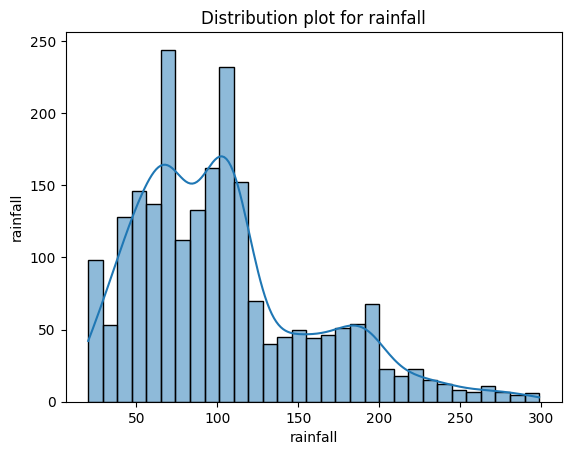

In [8]:
weather_cols = ['temperature','humidity','ph','rainfall']
for i in weather_cols:
    sns.histplot(df[i],kde=True)
    plt.title(f'Distribution plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()

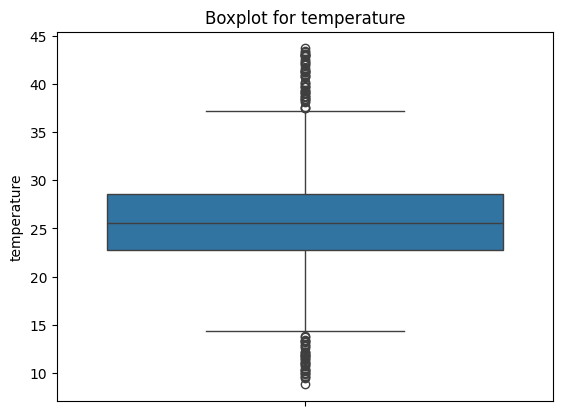

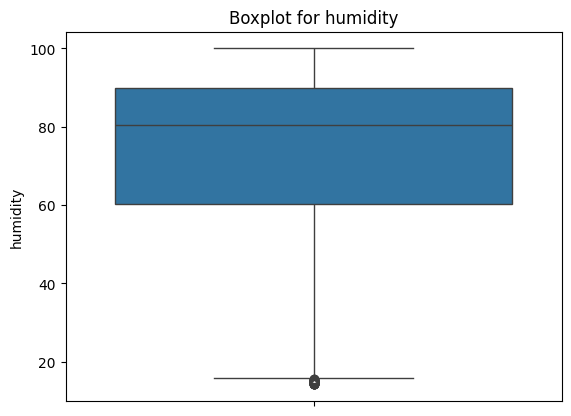

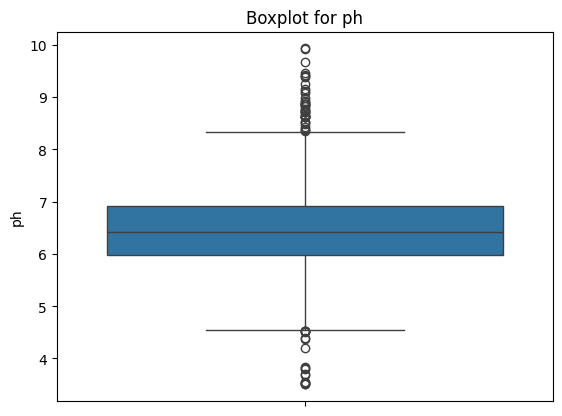

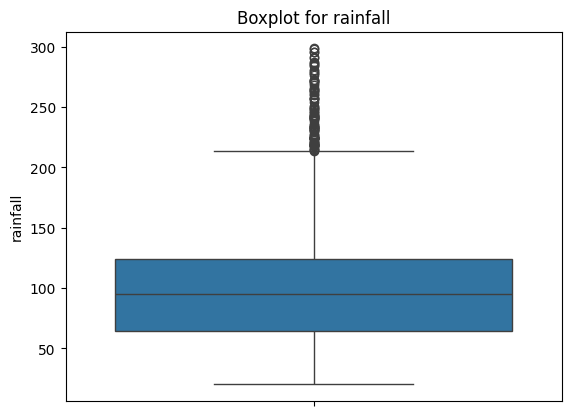

In [9]:
for i in weather_cols:
    sns.boxplot(df[i])
    plt.title(f'Boxplot for {i}')
    plt.ylabel(f'{i}')
    plt.show()

In [10]:
print(f"Shape of data with outliers is {df.shape}")
column_with_outliers = ['P','K','temperature','humidity','ph','rainfall']
for col in column_with_outliers:
    upper_bound = df[col].mean() + (2*df[col].std())
    lower_bound = df[col].mean() - (2*df[col].std())
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
print(f"Shape of data without outliers is {df.shape}")

Shape of data with outliers is (2200, 8)
Shape of data without outliers is (1553, 8)


In [11]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice


In [12]:
unique_labels = df['label'].unique()
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
df['label'] = df['label'].map(label_to_int)

In [13]:
label_to_int

{'rice': 0,
 'maize': 1,
 'pigeonpeas': 2,
 'mothbeans': 3,
 'mungbean': 4,
 'blackgram': 5,
 'lentil': 6,
 'pomegranate': 7,
 'banana': 8,
 'mango': 9,
 'watermelon': 10,
 'muskmelon': 11,
 'orange': 12,
 'papaya': 13,
 'coconut': 14,
 'cotton': 15,
 'jute': 16,
 'coffee': 17}

In [14]:
df.label.value_counts()

label
17    100
14    100
16    100
15    100
4     100
5     100
6     100
7     100
8     100
1     100
10    100
11    100
9      77
12     75
2      63
13     50
3      46
0      42
Name: count, dtype: int64

In [15]:
df = df.sample(frac=1).reset_index(drop=True)

<Axes: >

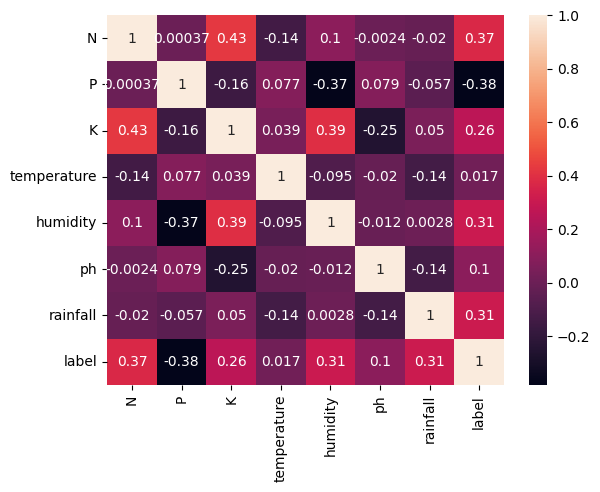

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.drop('temperature',inplace=True,axis=1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [19]:
X = df.drop('label',axis=1)
y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [22]:
report = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Learning rate set to 0.079742
0:	learn: 2.3754542	total: 165ms	remaining: 2m 44s
1:	learn: 2.0992909	total: 194ms	remaining: 1m 36s
2:	learn: 1.8551494	total: 223ms	remaining: 1m 14s
3:	learn: 1.6593320	total: 251ms	remaining: 1m 2s
4:	learn: 1.4919830	total: 280ms	remaining: 55.7s
5:	learn: 1.3627819	total: 308ms	remaining: 51.1s
6:	learn: 1.2560591	total: 335ms	remaining: 47.6s
7:	learn: 1.1448538	total: 364ms	remaining: 45.1s
8:	learn: 1.0668051	total: 393ms	remaining: 43.3s
9:	learn: 0.9889382	total: 420ms	remaining: 41.6s
10:	learn: 0.9224413	total: 450ms	remaining: 40.5s
11:	learn: 0.8623634	total: 489ms	remaining: 40.2s
12:	learn: 0.8027988	total: 516ms	remaining: 39.2s
13:	learn: 0.7582630	total: 546ms	remaining: 38.4s
14:	learn: 0.7116206	total: 574ms	remaining: 37.7s
15:	learn: 0.6660077	total: 600ms	remaining: 36.9s
16:	learn: 0.6252404	total: 629ms	remaining: 36.3s
17:	learn: 0.5887834	total: 657ms	remaining: 35.8s
18:	learn: 0.5577879	total: 685ms	remaining: 35.3s
19:	lear

In [23]:
df.head()

,N,P,K,humidity,ph,rainfall,label
0,121,53,19,76.726214,7.976889,80.112721,15
1,9,10,10,93.522119,6.010392,101.516459,12
2,20,29,27,92.360995,6.047044,157.759263,14
3,27,57,24,43.357960,6.091863,142.330368,2
4,11,41,19,41.814208,5.131779,44.138271,3


In [24]:
df.head()

,N,P,K,humidity,ph,rainfall,label
0,121,53,19,76.726214,7.976889,80.112721,15
1,9,10,10,93.522119,6.010392,101.516459,12
2,20,29,27,92.360995,6.047044,157.759263,14
3,27,57,24,43.357960,6.091863,142.330368,2
4,11,41,19,41.814208,5.131779,44.138271,3


In [25]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/processed_df.csv')

In [26]:
classifier = models[best_model_name]

In [27]:
df.columns

Index(['N', 'P', 'K', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [28]:
columns = ['N', 'P', 'K', 'humidity', 'ph', 'rainfall']
x = [38,72,21,49.442135,5.902103,186.500858]
x = pd.DataFrame([x],columns=columns)
x = scaler.transform(x)

In [29]:
pred = classifier.predict(x)

In [30]:
pred

array([[2]], dtype=int64)